# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1032.
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.51e-42
Time:                        23:03:48   Log-Likelihood:                 4.1134
No. Observations:                  50   AIC:                           -0.2269
Df Residuals:                      46   BIC:                             7.421
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1147      0.079     64.584      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.65425977  5.09565471  5.5026979   5.85180993  6.12792107  6.3269472
  6.45646081  6.53444684  6.58634785  6.64088385  6.72533367  6.86105317
  7.0599665   7.32260698  7.63802954  7.98560888  8.33842824  8.66770165
  8.94750347  9.15902785  9.29367849  9.35448099  9.35558574  9.31994308
  9.27553259  9.25076615  9.26981994  9.34866235  9.49243043  9.6945859
  9.93798935 10.19771619 10.44515172 10.65269243 10.79828116 10.86903106
 10.86334285 10.79116756 10.67237162 10.53347289 10.40328378 10.30817753
 10.2677551  10.29162483 10.37782379 10.5131403  10.67528457 10.83655083
 10.96836934 11.0460003 ]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.04343058 10.92605836 10.7108508  10.43647391 10.15382578  9.91357492
  9.75375487  9.69045225  9.71386819  9.79071745]


## Plot comparison

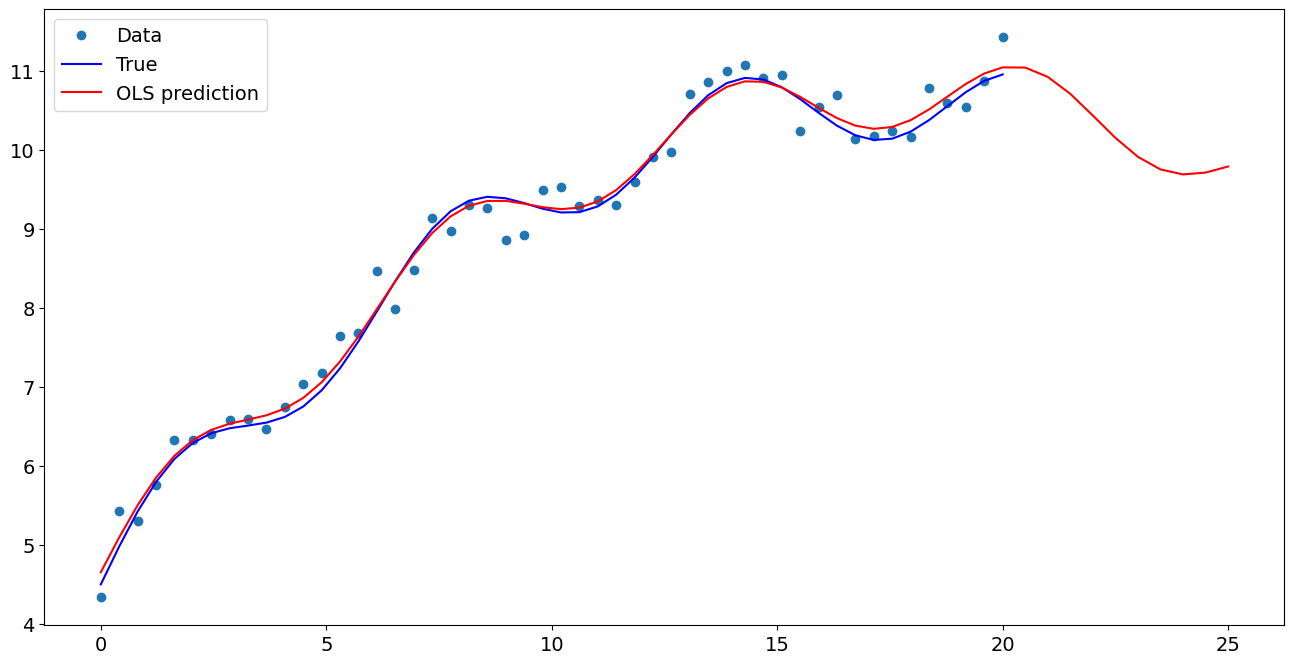

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.114703
x1                  0.484015
np.sin(x1)          0.432657
I((x1 - 5) ** 2)   -0.018418
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.043431
1    10.926058
2    10.710851
3    10.436474
4    10.153826
5     9.913575
6     9.753755
7     9.690452
8     9.713868
9     9.790717
dtype: float64